<a href="https://colab.research.google.com/github/imad3k/Gas_station_analysis/blob/main/c_store_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries for loading the data and loading the charts

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [4]:
# Reading in the data from google drive

# d_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
# df = pd.read_csv('test_raw data.csv')

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/AFIS_Data/test_raw data.csv')

In [6]:
df.head()

,DATE,DAILY SALE,GROCERY,DAILY DROP,GAS,CREDIT CARD,PAID OUTS,TAX,CASH,CASH TO GAS,LOTTO SALE,LOTTO DROP
0,2016-10-31,2953,1952,0,1061,1121,743,102,1089,0,846.0,-70.0
1,2016-11-01,3526,2068,0,1458,1119,547,112,1510,350,447.0,397.0
2,2016-11-02,2807,1721,0,1086,985,1006,97,816,100,1100.0,190.0
3,2016-11-03,3355,2030,0,1325,1275,1074,115,1006,50,1135.0,430.0
4,2016-11-04,3091,2011,0,1088,1096,492,110,1503,0,1276.0,290.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         413 non-null    object 
 1   DAILY SALE   413 non-null    int64  
 2   GROCERY      413 non-null    int64  
 3   DAILY DROP   413 non-null    int64  
 4   GAS          413 non-null    int64  
 5   CREDIT CARD  413 non-null    int64  
 6   PAID OUTS    413 non-null    int64  
 7   TAX          413 non-null    int64  
 8   CASH         413 non-null    int64  
 9   CASH TO GAS  413 non-null    int64  
 10  LOTTO SALE   399 non-null    float64
 11  LOTTO DROP   403 non-null    float64
dtypes: float64(2), int64(9), object(1)
memory usage: 38.8+ KB


In [8]:
# Convert Date to datetime object

df.DATE = pd.to_datetime(df.DATE, format = '%Y-%m-%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         413 non-null    datetime64[ns]
 1   DAILY SALE   413 non-null    int64         
 2   GROCERY      413 non-null    int64         
 3   DAILY DROP   413 non-null    int64         
 4   GAS          413 non-null    int64         
 5   CREDIT CARD  413 non-null    int64         
 6   PAID OUTS    413 non-null    int64         
 7   TAX          413 non-null    int64         
 8   CASH         413 non-null    int64         
 9   CASH TO GAS  413 non-null    int64         
 10  LOTTO SALE   399 non-null    float64       
 11  LOTTO DROP   403 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 38.8 KB


In [11]:
# Add in a day of the week column (it'll tell you what day it was, monday, tuesday...)

df['Day_of_the_Week'] = df['DATE'].dt.day_name()

In [12]:
df.head()

,DATE,DAILY SALE,GROCERY,DAILY DROP,GAS,CREDIT CARD,PAID OUTS,TAX,CASH,CASH TO GAS,LOTTO SALE,LOTTO DROP,Day_of_the_Week
0,2016-10-31,2953,1952,0,1061,1121,743,102,1089,0,846.0,-70.0,Monday
1,2016-11-01,3526,2068,0,1458,1119,547,112,1510,350,447.0,397.0,Tuesday
2,2016-11-02,2807,1721,0,1086,985,1006,97,816,100,1100.0,190.0,Wednesday
3,2016-11-03,3355,2030,0,1325,1275,1074,115,1006,50,1135.0,430.0,Thursday
4,2016-11-04,3091,2011,0,1088,1096,492,110,1503,0,1276.0,290.0,Friday


In [13]:
# Adding in a Week Number column

df['Week_Number'] = df['DATE'].dt.isocalendar().week

In [14]:
df.tail()


,DATE,DAILY SALE,GROCERY,DAILY DROP,GAS,CREDIT CARD,PAID OUTS,TAX,CASH,CASH TO GAS,LOTTO SALE,LOTTO DROP,Day_of_the_Week,Week_Number
408,2018-01-03,3426,1884,150,1542,1135,204,77,1530,407,1065.0,315.0,Wednesday,1
409,2018-01-04,3680,2034,0,1646,1437,2009,73,34,200,800.0,94.0,Thursday,1
410,2018-01-05,3874,1954,100,1920,1596,738,80,1116,324,640.0,410.0,Friday,1
411,2018-01-06,3220,1627,100,1593,1407,0,45,1527,186,1251.0,819.0,Saturday,1
412,2018-01-07,2724,1306,100,1318,933,0,34,1306,385,821.0,0.0,Sunday,1


In [16]:
# Add a month column

df['Month'] = df['DATE'].apply(lambda x: x.strftime('%b'))

In [17]:
df.head()

,DATE,DAILY SALE,GROCERY,DAILY DROP,GAS,CREDIT CARD,PAID OUTS,TAX,CASH,CASH TO GAS,LOTTO SALE,LOTTO DROP,Day_of_the_Week,Week_Number,Month
0,2016-10-31,2953,1952,0,1061,1121,743,102,1089,0,846.0,-70.0,Monday,44,Oct
1,2016-11-01,3526,2068,0,1458,1119,547,112,1510,350,447.0,397.0,Tuesday,44,Nov
2,2016-11-02,2807,1721,0,1086,985,1006,97,816,100,1100.0,190.0,Wednesday,44,Nov
3,2016-11-03,3355,2030,0,1325,1275,1074,115,1006,50,1135.0,430.0,Thursday,44,Nov
4,2016-11-04,3091,2011,0,1088,1096,492,110,1503,0,1276.0,290.0,Friday,44,Nov


# Data Visualization
## <br> 1. Removing the Daily Sale column because its an aggregate of Grocery + Gas

In [18]:
# create a list of columns to keep
columns_to_keep =  ['DATE',
                    'GROCERY',
                    'GAS',
                    'CREDIT CARD',
                    'PAID OUTS',
                    'TAX',
                    'CASH',
                    'CASH TO GAS',
                    'Day_of_the_Week',
                    'Week_Number',
                    'Month']

In [19]:
# redefine the gdf with only columns to keep
df = df[columns_to_keep]

In [20]:
df.head()

,DATE,GROCERY,GAS,CREDIT CARD,PAID OUTS,TAX,CASH,CASH TO GAS,Day_of_the_Week,Week_Number,Month
0,2016-10-31,1952,1061,1121,743,102,1089,0,Monday,44,Oct
1,2016-11-01,2068,1458,1119,547,112,1510,350,Tuesday,44,Nov
2,2016-11-02,1721,1086,985,1006,97,816,100,Wednesday,44,Nov
3,2016-11-03,2030,1325,1275,1074,115,1006,50,Thursday,44,Nov
4,2016-11-04,2011,1088,1096,492,110,1503,0,Friday,44,Nov


# Grocery Sales Visualized

Text(0.5, 8.960000000000022, 'Grocery Sales')

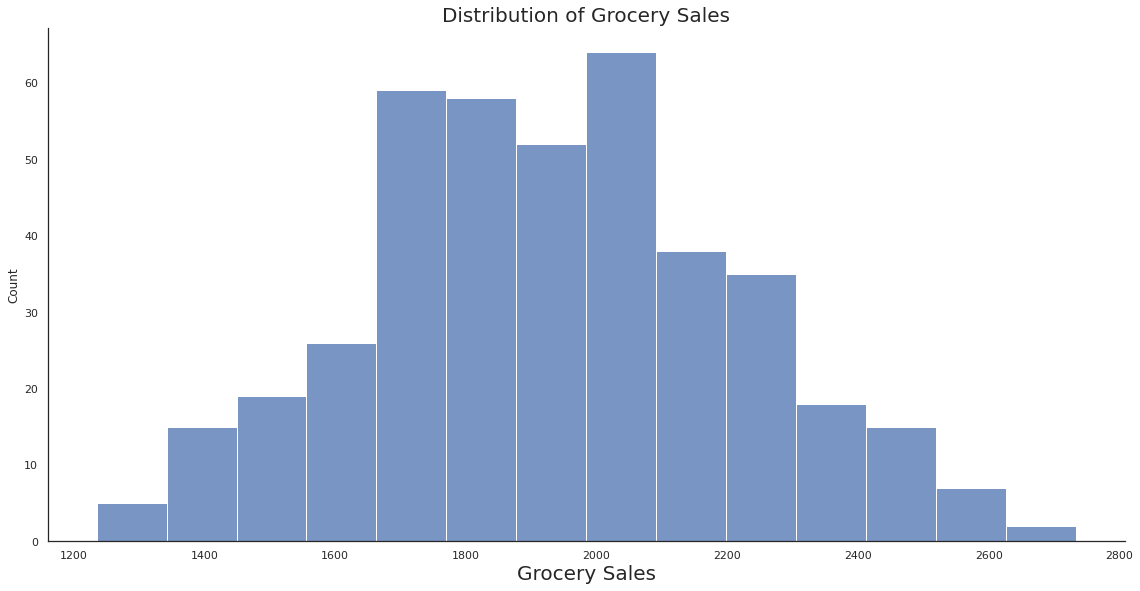

In [55]:
# Distribution of Grocery sales


sns.set_style("white")
sns.displot(df, x="GROCERY", height = 8, aspect = 2, palette="deep")
plt.title('Distribution of Grocery Sales', fontsize = 20)
plt.xlabel('Grocery Sales', fontsize = 20)


Text(0.5, 0, '')

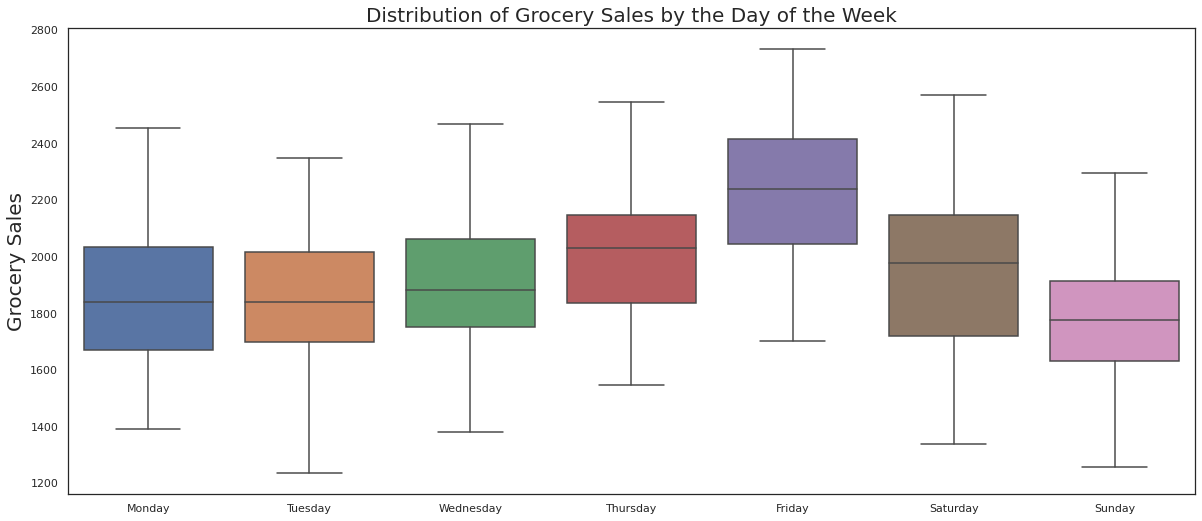

In [84]:
# Box plot of grocery sales by the day of the week

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.boxplot(x='Day_of_the_Week', y='GROCERY', data=df)
plt.title('Distribution of Grocery Sales by the Day of the Week', fontsize = 20)
plt.ylabel('Grocery Sales', fontsize = 20)
plt.xlabel('')

Text(0, 0.5, 'Average Grocery Sale Amount')

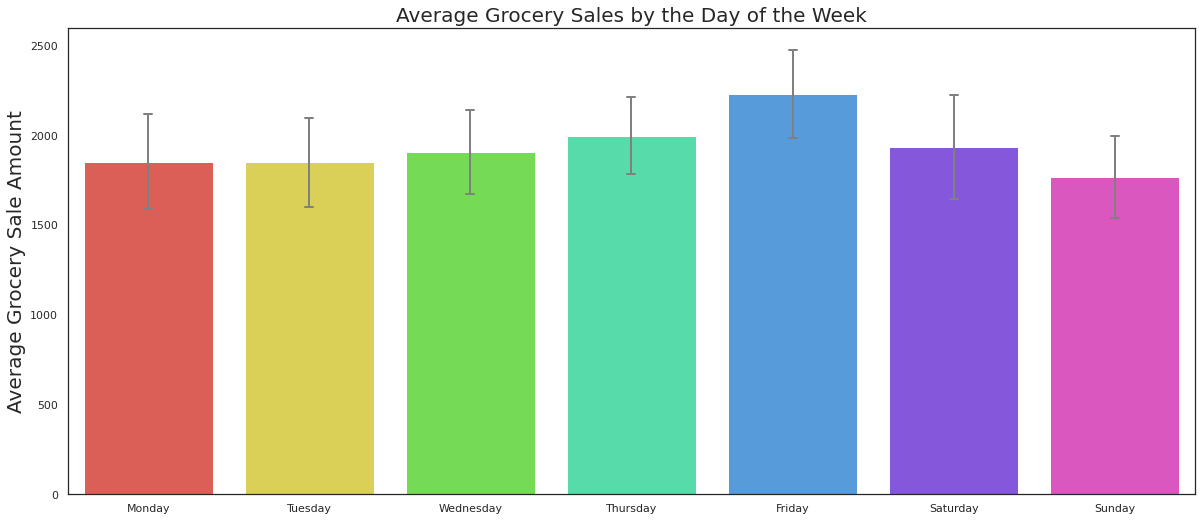

In [87]:
# Use Group by to see the mean grocery sales for each day

# dfg = df.groupby(['Day_of_the_Week'])['GROCERY'].mean()

# sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
# sns.set_style("white")
# dfg.plot(kind='bar', title='Average Grocery Sales by Day of the Week', ylabel='Average Grocery Sales',
#         xlabel='Day of the Week', color = 'pink')


sns.barplot(x = 'Day_of_the_Week', y = 'GROCERY', data = df,
            palette = 'hls',  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.title('Average Grocery Sales by the Day of the Week', fontsize = 20)
plt.xlabel('')
plt.ylabel('Average Grocery Sale Amount', fontsize=20)

Text(0.5, 0, '')

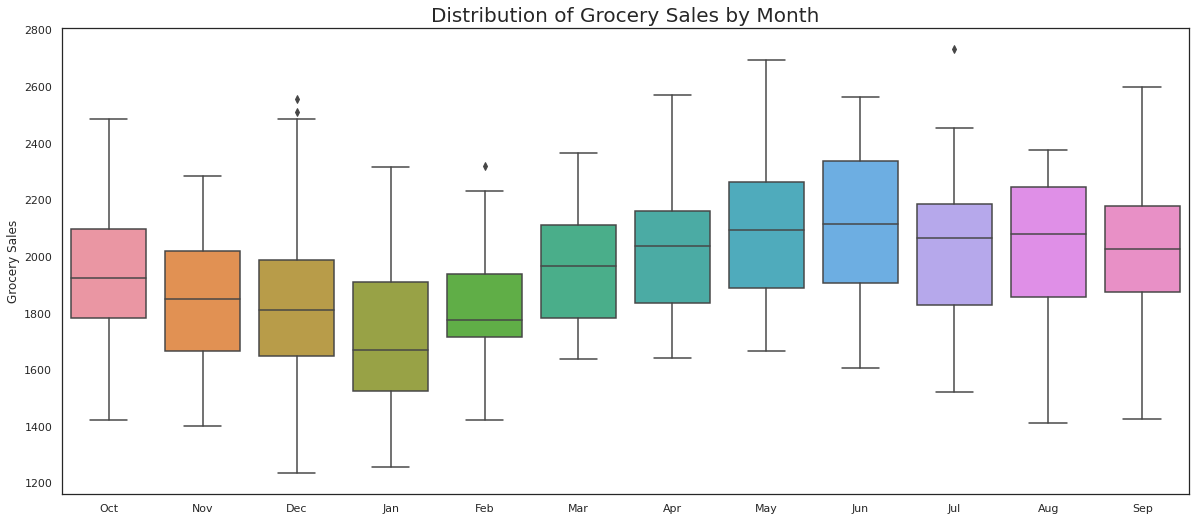

In [85]:
# Distribution of Grocery sales by month

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.boxplot(x='Month', y='GROCERY', data=df)
plt.title('Distribution of Grocery Sales by Month', fontsize = 20)
plt.ylabel('Grocery Sales')
plt.xlabel('')

Text(0, 0.5, 'Average Grocery Sale Amount')

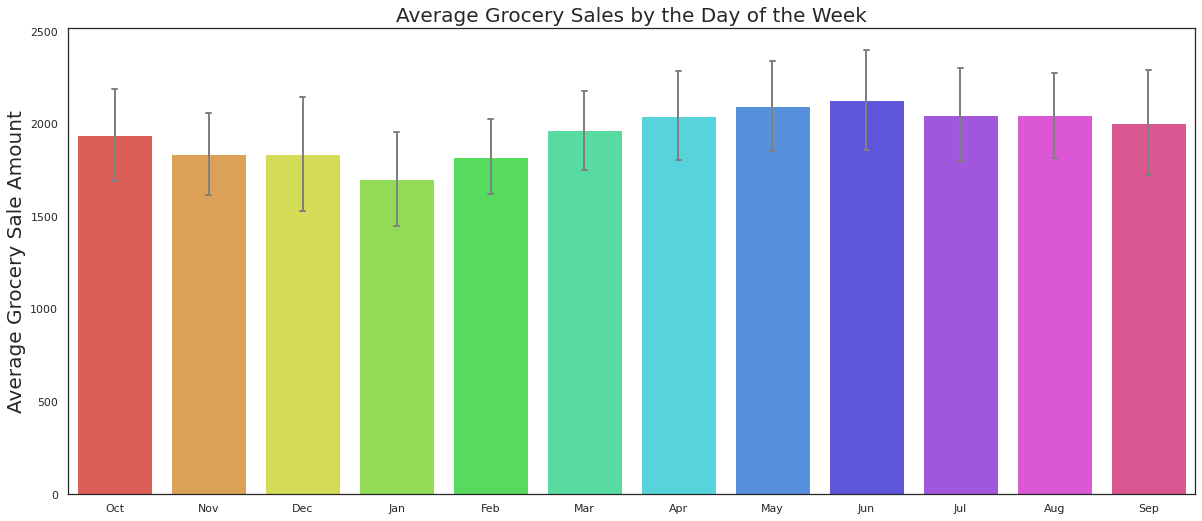

In [88]:
# Grocery Sales by Month

sns.barplot(x = 'Month', y = 'GROCERY', data = df,
            palette = 'hls',  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.title('Average Grocery Sales by the Day of the Week', fontsize = 20)
plt.xlabel('')
plt.ylabel('Average Grocery Sale Amount', fontsize=20)

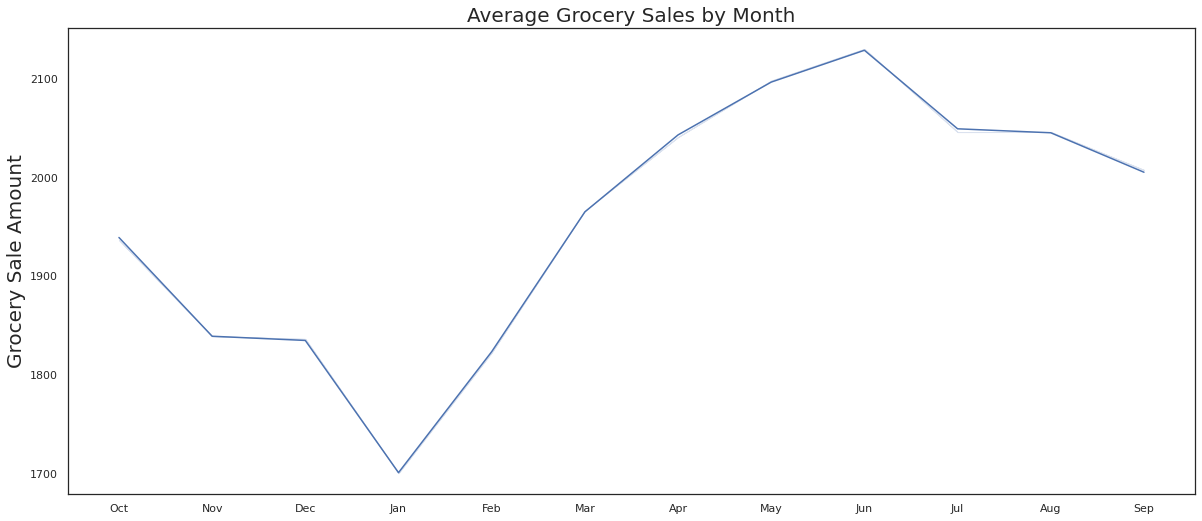

In [86]:
# Plot Average Grocery Sales by Month

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.lineplot(x = 'Month', y = 'GROCERY', data = df, ci = False)
plt.title('Average Grocery Sales by Month', fontsize = 20)
plt.xlabel('')
plt.ylabel('Grocery Sale Amount', fontsize=20)
plt.show()

# Visualizing Gas Sales

Text(0.5, 8.960000000000022, 'Gas Sales')

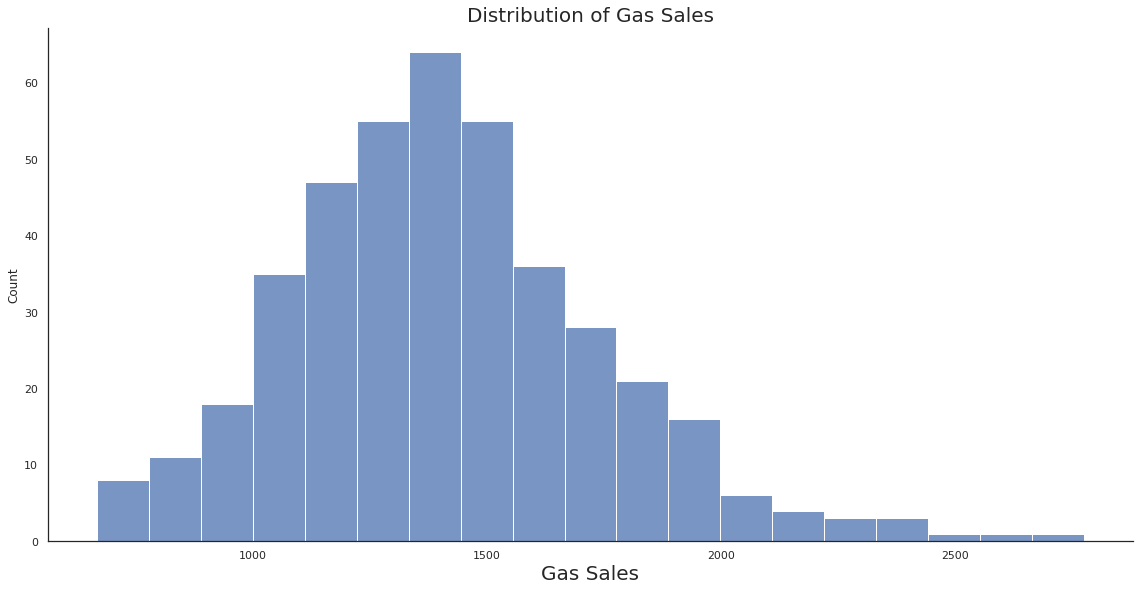

In [56]:
# Plot Gas Sales distribution

# Setup Variables

mon = df[df['Day_of_the_Week'] == 'Monday']
tue = df[df['Day_of_the_Week'] == 'Tuesday']
wed = df[df['Day_of_the_Week'] == 'Wednesday']
thurs = df[df['Day_of_the_Week'] == 'Thursday']
fri = df[df['Day_of_the_Week'] == 'Friday']
sat = df[df['Day_of_the_Week'] == 'Saturday']
sun = df[df['Day_of_the_Week'] == 'Sunday']

sns.set_style("white")
sns.displot(df, x="GAS", height = 8, aspect = 2, palette="deep")
plt.title('Distribution of Gas Sales', fontsize = 20)
plt.xlabel('Gas Sales', fontsize = 20)

Text(0, 0.5, 'Average Gas Sale Amount')

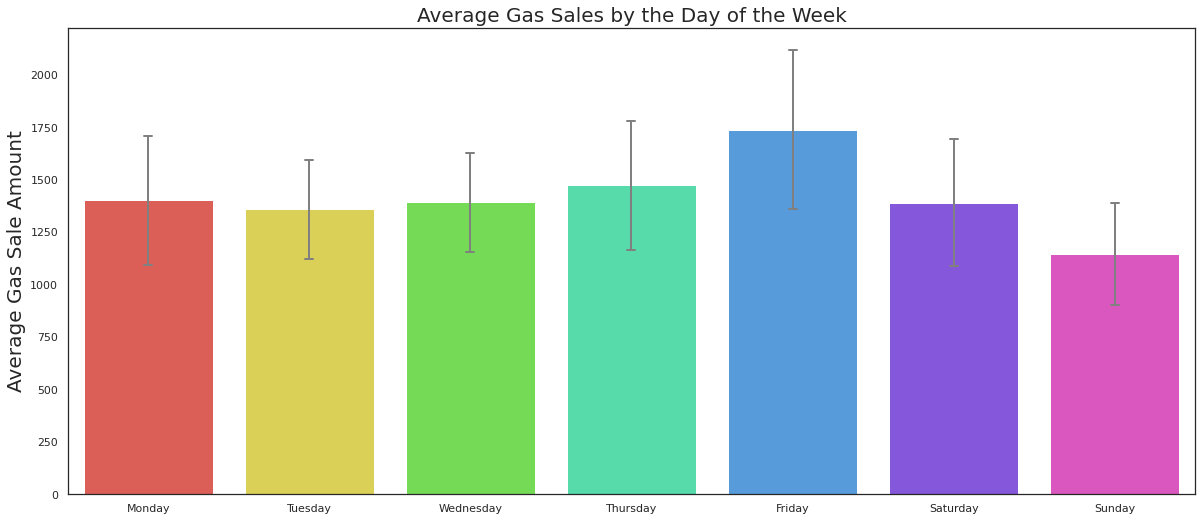

In [92]:
# Use Group by to see the mean grocery sales for each day

# dfg = df.groupby(['Day_of_the_Week'])['GROCERY'].mean()

# sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
# sns.set_style("white")
# dfg.plot(kind='bar', title='Average Grocery Sales by Day of the Week', ylabel='Average Grocery Sales',
#         xlabel='Day of the Week', color = 'pink')


sns.barplot(x = 'Day_of_the_Week', y = 'GAS', data = df,
            palette = 'hls',  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.title('Average Gas Sales by the Day of the Week', fontsize = 20)
plt.xlabel('')
plt.ylabel('Average Gas Sale Amount', fontsize=20)

Text(0.5, 0, '')

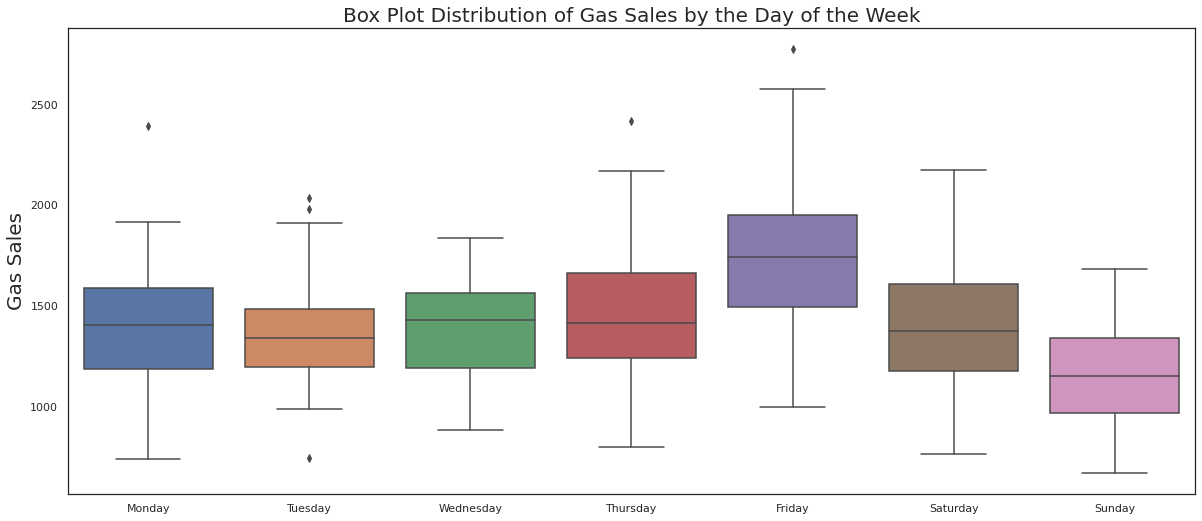

In [93]:
# Box plot of gas sales by the day of the week

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.boxplot(x='Day_of_the_Week', y='GAS', data=df)
plt.title('Box Plot Distribution of Gas Sales by the Day of the Week', fontsize = 20)
plt.ylabel('Gas Sales', fontsize = 20)
plt.xlabel('')

Text(0, 0.5, 'Average Gas Sale Amount')

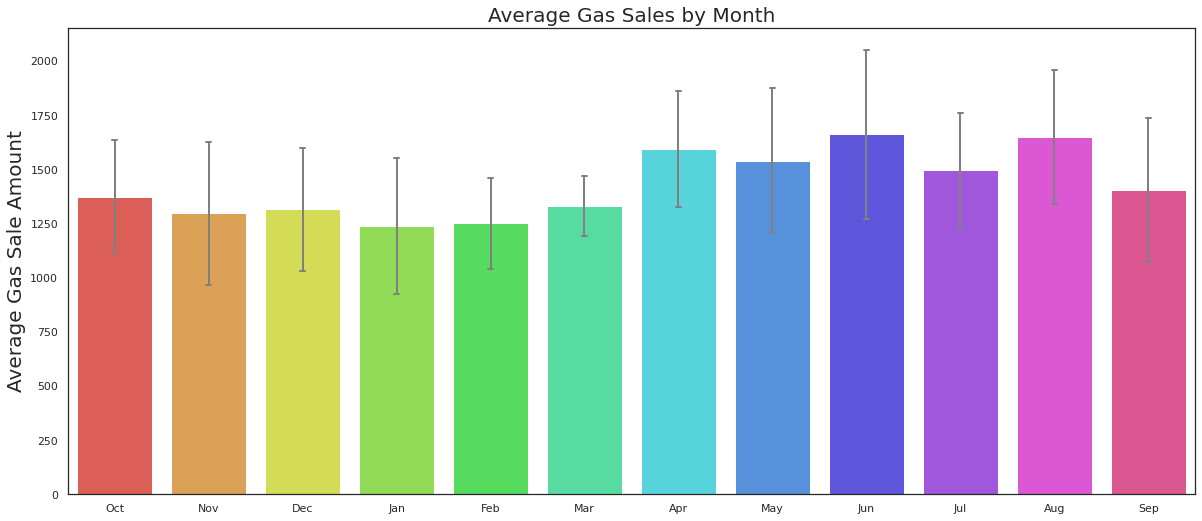

In [89]:
# Use Group by to see the mean grocery sales for each day

sns.barplot(x = 'Month', y = 'GAS', data = df,
            palette = 'hls',  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.title('Average Gas Sales by Month', fontsize = 20)
plt.xlabel('')
plt.ylabel('Average Gas Sale Amount', fontsize=20)

Text(0.5, 0, '')

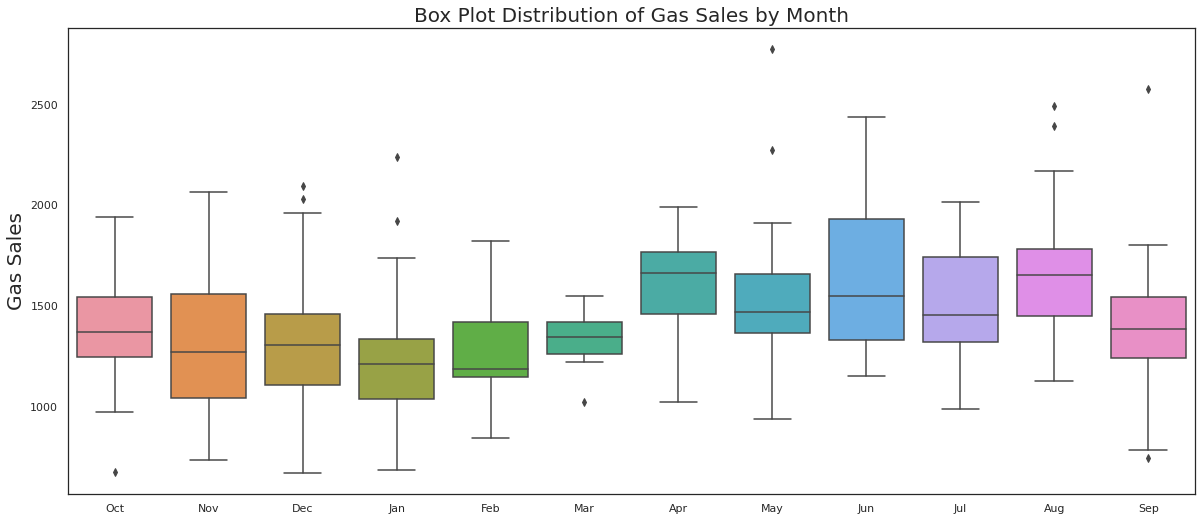

In [94]:
# Box plot of gas sales by the month

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.boxplot(x='Month', y='GAS', data=df)
plt.title('Box Plot Distribution of Gas Sales by Month', fontsize = 20)
plt.ylabel('Gas Sales', fontsize = 20)
plt.xlabel('')

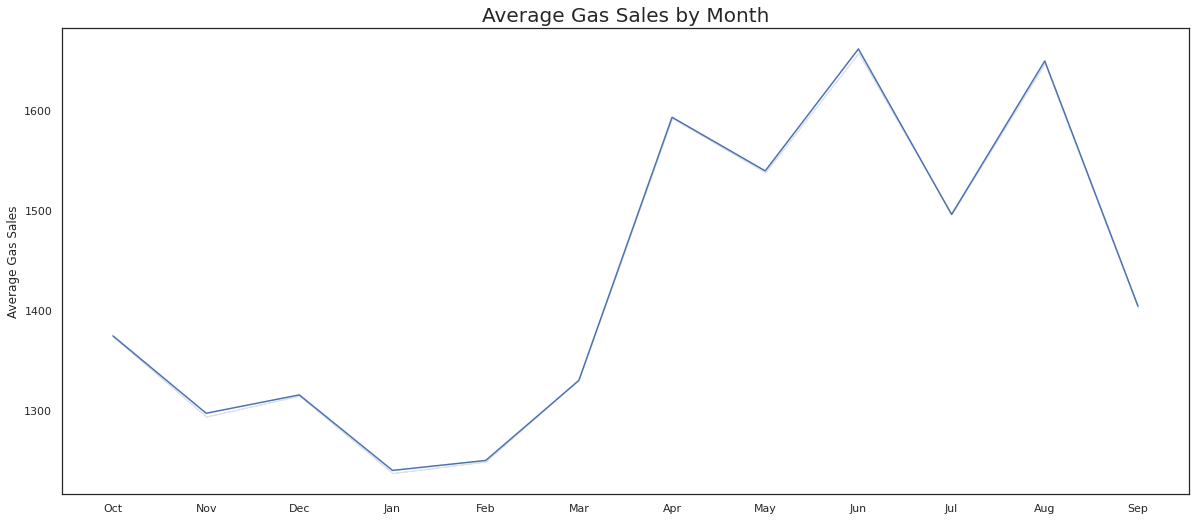

In [90]:
# Plot Gas Sales by Month

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.lineplot(x = 'Month', y = 'GAS', data = df, ci = False)
plt.title('Average Gas Sales by Month', fontsize = 20)
plt.xlabel('')
plt.ylabel('Average Gas Sales')
plt.show()

# Correlation Study

## Are Gas and Grocery Sales Correlated?

Text(0.5, 0, 'Grocery Sales')

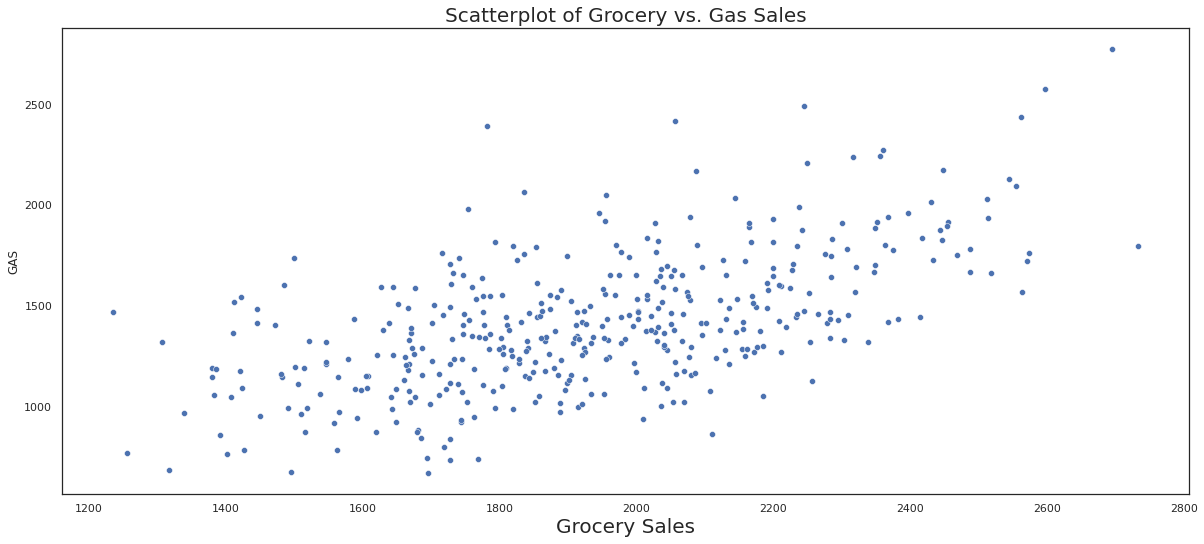

In [91]:
# Any correlation between Grocery and Gas Sales?

sns.set(rc={"figure.figsize":(18, 8)}) #width=18, height=8
sns.set_style("white")
sns.scatterplot(x=df['GROCERY'], y=df['GAS'])
plt.title('Scatterplot of Grocery vs. Gas Sales', fontsize = 20)
plt.xlabel('Grocery Sales', fontsize = 20)

In [99]:
# Lets calculate the mean and standard deviation of both Grocery and Gas Sales

grocery_data = df['GROCERY']
mean_grocery = np.mean(df['GROCERY'])
std_grocery = np.std(df["GROCERY"])

gas_data = df["GAS"]
mean_gas = np.mean(df['GAS'])
std_gas = np.std(df["GAS"])


print('Statistical Summary')
print('Grocery Sales: mean = %.3f , standard deviation = %.3f' % (np.mean(df['GROCERY']), np.std(df["GROCERY"])))
print('Gas Sales: mean= % .3f , standard deviation = %.3f' % (np.mean(df['GAS']), np.std(df["GAS"])))

Statistical Summary
Grocery Sales: mean = 1933.961 , standard deviation = 284.375
Gas Sales: mean=  1413.545 , standard deviation = 334.358


In [103]:
correlation = grocery_data.corr(gas_data)
print('The correlation between Grocery and Gas Sales = ', correlation)
print('There seems to be some correlation, but not much.')

The correlation between Grocery and Gas Sales =  0.5901301788809776
There seems to be some correlation, but not much


# Correlation Matrix

Text(0.5, 1.0, 'Heatmap Showing Correlations Among the Variables (columns) in our Data Set')

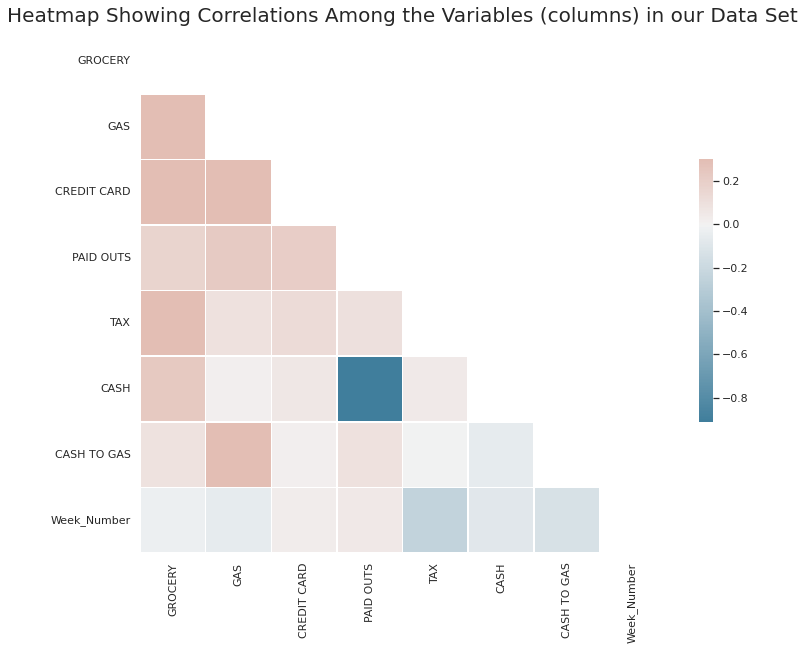

In [112]:
# Exploring (if any) correlations among other variables (columns)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap Showing Correlations Among the Variables (columns) in our Data Set', fontsize = 20)


## The Correlogram below charts out a scatter plot of variables compared to each other (pair wise scatter plots).

<br> Correlograms provide a quick way to see if any of your variables are correlated. When performing linear regression it is best to remove any variables that are highly correlated.

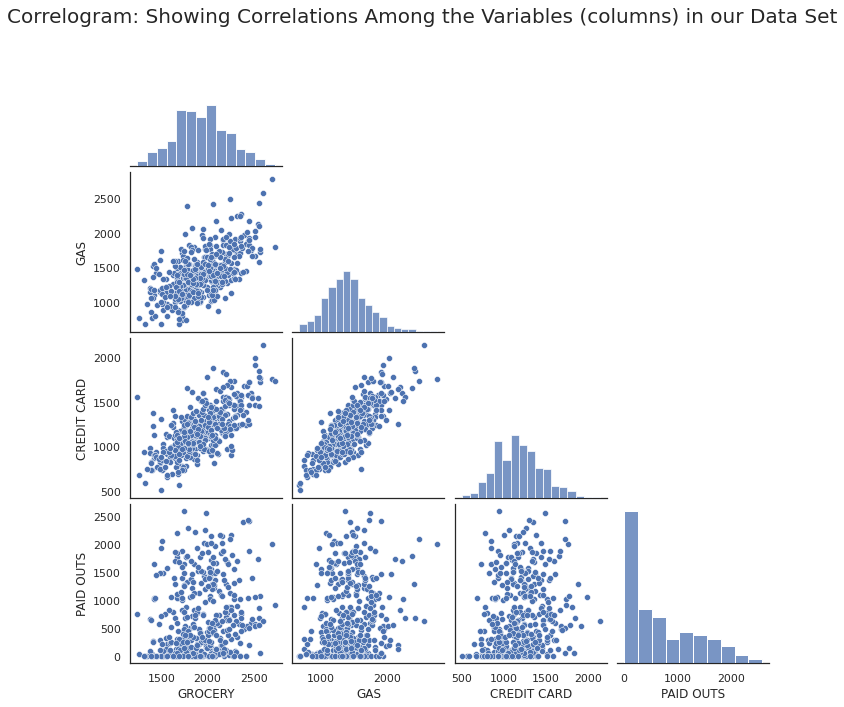

In [115]:
# Basic correlogram


sns.pairplot(df,
             # hue='Day_of_the_Week',
             diag_kind="hist",
             x_vars=["GROCERY", "GAS", "CREDIT CARD", "PAID OUTS"],
             y_vars=["GROCERY", "GAS", "CREDIT CARD", "PAID OUTS"],
             corner=True)

plt.suptitle('Correlogram: Showing Correlations Among the Variables (columns) in our Data Set', fontsize = 20)

plt.show()